# Loading the gdrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Importing the Libraries

In [ ]:
import numpy as np                    # Mathematical Calculations
import pandas as pd                   # Manipulation of raw data
import matplotlib.pyplot as plt       # Plotting the graphs
import seaborn as sns
import plotly.express as px           # For creating interactive publication quality graphs
%matplotlib inline

# Importing the Dataset

In [ ]:
data = pd.read_csv('/gdrive/My Drive/TROP-ICSU-Internship-Sahil-Ashutosh/Assignment-1-Emissions/Analysis/Data/1900-1950/Sectors/Sources_(1900-1950).csv')

In [ ]:
data.head()

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,longitude,latitude
0,Argentina,1900,0.534,2.070,7.085,0.183,0.438,1.379,-58.382,-34.604
1,Armenia,1900,3.890,0.050,1.782,90.518,0.329,1.379,45.038,40.069
2,Australia,1900,0.327,10.047,0.298,1.924,0.121,1.379,151.210,-33.865
3,Austria,1900,2.849,27.696,17.078,78.756,135.311,3.868,14.550,47.516
4,Azerbaijan,1900,1.765,0.026,0.128,16.710,1.059,1.183,48.500,41.400


In [ ]:
data.tail()

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,longitude,latitude
3499,United States,1950,19.723,1257.232,43.122,319.219,896.801,14.813,-100.0,40.0
3500,Uzbekistan,1950,0.660,12.379,10.810,1.476,6.367,27.588,63.0,42.0
3501,Venezuela,1950,0.247,0.004,27.817,2.305,7.903,27.588,-65.0,7.0
3502,Vietnam,1950,0.073,1.039,14.335,12.402,0.367,27.588,108.0,16.0
3503,Zimbabwe,1950,0.044,2.860,0.572,1.249,0.276,27.588,30.0,-20.0


In [ ]:
data = data.round(4)

In [ ]:
data.drop('other_industry_co2', axis = 1, inplace = True)

# Normalizing the data into the scale of 0 and +1 by using min-max scaler function

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Storing the MinMaxScaler in the variable scalerr
scaler = MinMaxScaler()

In [ ]:
# Performing the scaling on the cement_co2 attribute
scaler.fit(data[['cement_co2']])
data[['cement_co2']]=scaler.transform(data[['cement_co2']])
data.head()

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,longitude,latitude
0,Argentina,1900,0.003838,2.070,7.085,0.183,0.438,-58.382,-34.604
1,Armenia,1900,0.028003,0.050,1.782,90.518,0.329,45.038,40.069
2,Australia,1900,0.002347,10.047,0.298,1.924,0.121,151.210,-33.865
3,Austria,1900,0.020507,27.696,17.078,78.756,135.311,14.550,47.516
4,Azerbaijan,1900,0.012702,0.026,0.128,16.710,1.059,48.500,41.400


In [ ]:
# Performing the scaling on the coal_co2 attribute
scaler.fit(data[['coal_co2']])
data[['coal_co2']]=scaler.transform(data[['coal_co2']])
data.head()

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,longitude,latitude
0,Argentina,1900,0.003838,0.001334,7.085,0.183,0.438,-58.382,-34.604
1,Armenia,1900,0.028003,0.000032,1.782,90.518,0.329,45.038,40.069
2,Australia,1900,0.002347,0.006477,0.298,1.924,0.121,151.210,-33.865
3,Austria,1900,0.020507,0.017855,17.078,78.756,135.311,14.550,47.516
4,Azerbaijan,1900,0.012702,0.000016,0.128,16.710,1.059,48.500,41.400


In [ ]:
# Performing the scaling on the flaring_co2 attribute
scaler.fit(data[['flaring_co2']])
data[['flaring_co2']]=scaler.transform(data[['flaring_co2']])
data.head()

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,longitude,latitude
0,Argentina,1900,0.003838,0.001334,0.164243,0.183,0.438,-58.382,-34.604
1,Armenia,1900,0.028003,0.000032,0.041258,90.518,0.329,45.038,40.069
2,Australia,1900,0.002347,0.006477,0.006842,1.924,0.121,151.210,-33.865
3,Austria,1900,0.020507,0.017855,0.395997,78.756,135.311,14.550,47.516
4,Azerbaijan,1900,0.012702,0.000016,0.002899,16.710,1.059,48.500,41.400


In [ ]:
# Performing the scaling on the gas_co2 attribute
scaler.fit(data[['gas_co2']])
data[['gas_co2']]=scaler.transform(data[['gas_co2']])
data.head()

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,longitude,latitude
0,Argentina,1900,0.003838,0.001334,0.164243,0.000573,0.438,-58.382,-34.604
1,Armenia,1900,0.028003,0.000032,0.041258,0.283561,0.329,45.038,40.069
2,Australia,1900,0.002347,0.006477,0.006842,0.006027,0.121,151.210,-33.865
3,Austria,1900,0.020507,0.017855,0.395997,0.246715,135.311,14.550,47.516
4,Azerbaijan,1900,0.012702,0.000016,0.002899,0.052347,1.059,48.500,41.400


In [ ]:
# Performing the scaling on the oil_co2 attribute
scaler.fit(data[['oil_co2']])
data[['oil_co2']]=scaler.transform(data[['oil_co2']])
data.head()

,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,longitude,latitude
0,Argentina,1900,0.003838,0.001334,0.164243,0.000573,0.001814,-58.382,-34.604
1,Armenia,1900,0.028003,0.000032,0.041258,0.283561,0.001693,45.038,40.069
2,Australia,1900,0.002347,0.006477,0.006842,0.006027,0.001461,151.210,-33.865
3,Austria,1900,0.020507,0.017855,0.395997,0.246715,0.152008,14.550,47.516
4,Azerbaijan,1900,0.012702,0.000016,0.002899,0.052347,0.002506,48.500,41.400


# Creating some interactive graphs and maps for CO2 emissions from Cement Production

In [ ]:
# Showing the top 5 countries emitting the highest amount of CO2 from Cement Production

top_cement = data.groupby('country')['cement_co2'].sum().reset_index().sort_values(by=['cement_co2'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_cement)],
    x='year',
    y='cement_co2',
    color='country',
    title = 'Top 5 countries with highest CO2 emissions from Cement Production measured in Million Tonnes Per Year '
)

fig.show()

For the above graph we have only considered the emissions of United Kingdom and The United States because the emissions for Indonesia, Turkmenistan and Iran were almost very high during the statrting period and after 1930 the emissions have came down to zero.

This could be because of the fact that there were a lot of missing values for these nations and while filling these missing values using the interpolate, median and mean method this discrepancy could have been created or arised.

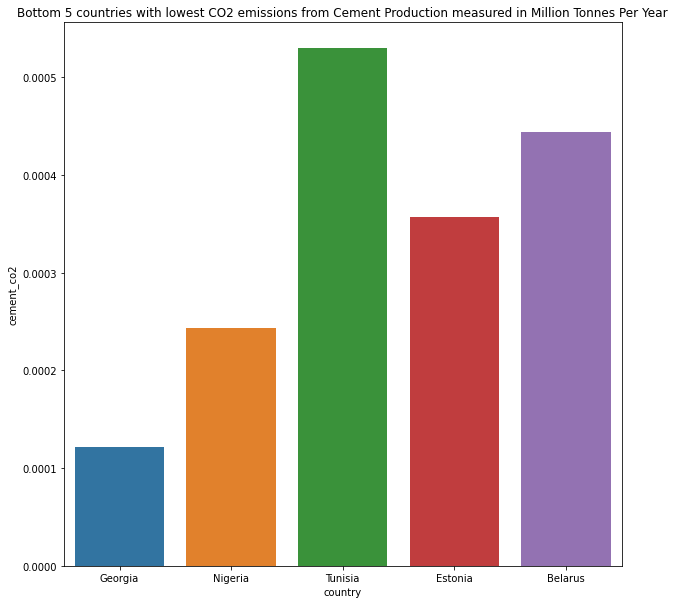

In [ ]:
# Showing the bottom 5 countries emitting the lowest amount of CO2 from Cement Production

bottom_cement = data.groupby('country')['cement_co2'].sum().reset_index().sort_values(by=['cement_co2'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(10,10))
g = sns.barplot(
    data = data[data['country'].isin(bottom_cement)],
    x ='country',
    y ='cement_co2',
    order = bottom_cement,
    ci=None
)
plt.title('Bottom 5 countries with lowest CO2 emissions from Cement Production measured in Million Tonnes Per Year')
plt.show()

In [ ]:
# Creating a time series chloropleth map for CO2 emissions from cement productions
fig = px.choropleth(
    data.groupby(['country', 'year'])['cement_co2'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='cement_co2',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions from Cement Production in Million Tonnes Per Year'
)

fig.show()

# Creating some interactive graphs and maps for CO2 emissions from coal production

In [ ]:
# Showing the top 5 countries emitting the highest amount of CO2 from Coal Production

top_coal = data.groupby('country')['coal_co2'].sum().reset_index().sort_values(by=['coal_co2'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_coal)],
    x='year',
    y='coal_co2',
    color='country',
    title = 'Top 5 countries with highest CO2 emissions from Coal Production measured in Million Tonnes Per Year '
)

fig.show()

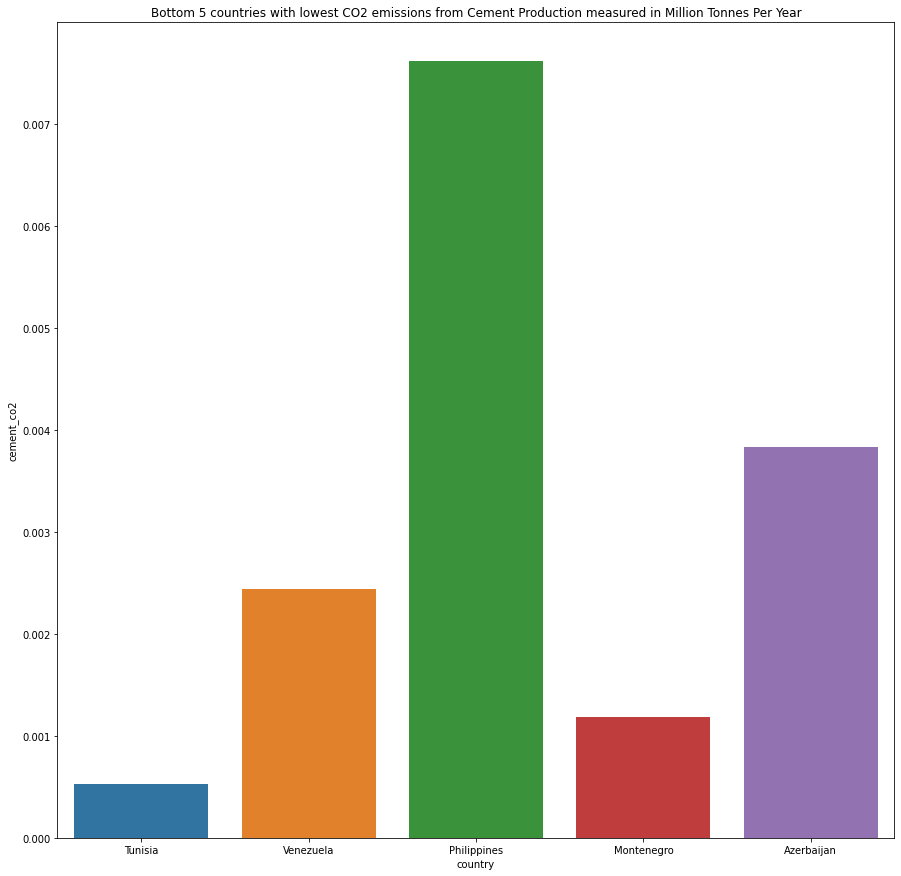

In [ ]:
# Showing the bottom 5 countries emitting the lowest amount of CO2 from Coal Production

bottom_coal = data.groupby('country')['coal_co2'].sum().reset_index().sort_values(by=['coal_co2'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_coal)],
    x ='country',
    y ='cement_co2',
    order = bottom_coal,
    ci=None
)

#g.set(ylim=(0,0.004))
plt.title('Bottom 5 countries with lowest CO2 emissions from Cement Production measured in Million Tonnes Per Year')
plt.show()

In [ ]:
# Creating a time series chloropleth map for CO2 emissions from coal productions
fig = px.choropleth(
    data.groupby(['country', 'year'])['coal_co2'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='coal_co2',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions from Coal Production in Million Tonnes Per Year'
)

fig.show()

# Creating some interactive graphs and maps for CO2 emissions from gas flaring 

In [ ]:
# Showing the top 5 countries emitting the highest amount of CO2 from gas flaring

top_flaring = data.groupby('country')['flaring_co2'].sum().reset_index().sort_values(by=['flaring_co2'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_flaring)],
    x='year',
    y='flaring_co2',
    color='country',
    title = 'Top 5 countries with highest CO2 emissions from gas flaring measured in Million Tonnes Per Year '
)

fig.show()

In the above graph while making the report we have only considered the emissions for all the countries except Ireland because after doing lots of research we found that Ireland was not in the top emitters and this could have occured because of the fact that there were a lot of missing values for these nations and while filling these missing values using the interpolate, median and mean method this discrepancy could have been created or arised.

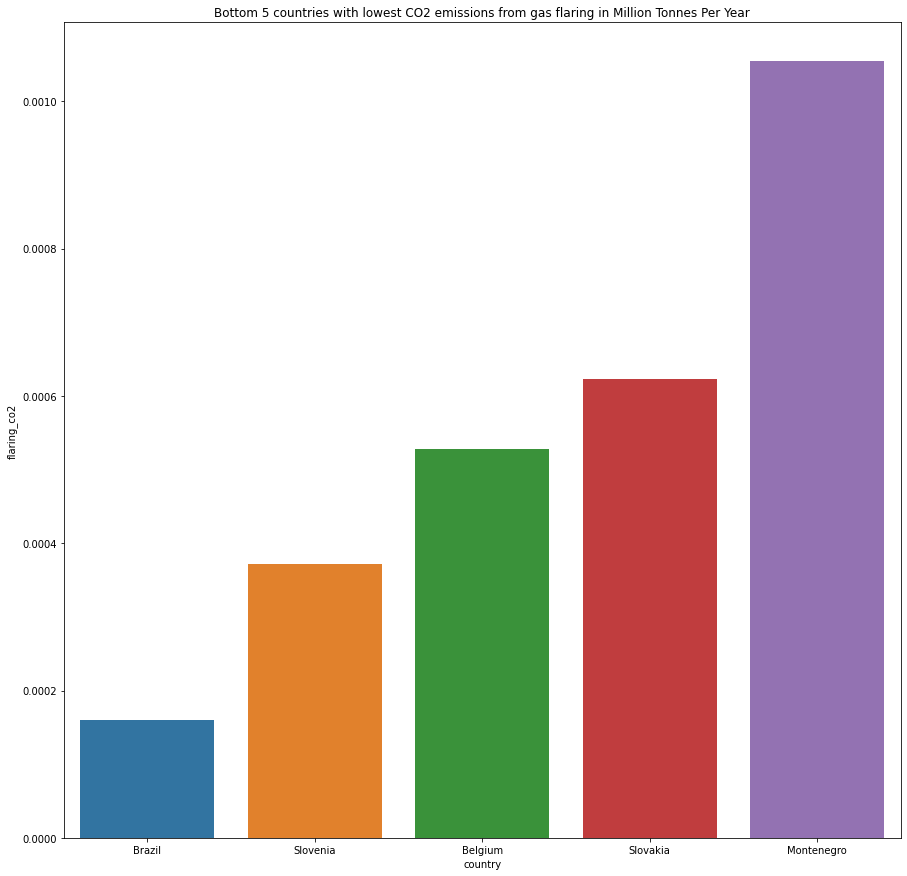

In [ ]:
# Showing the bottom 5 countries emitting the lowest amount of CO2 from gas flaring

bottom_flaring = data.groupby('country')['flaring_co2'].sum().reset_index().sort_values(by=['flaring_co2'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_flaring)],
    x ='country',
    y ='flaring_co2',
    order = bottom_flaring,
    ci=None
)

# g.set(ylim=(0,0.004))
plt.title('Bottom 5 countries with lowest CO2 emissions from gas flaring in Million Tonnes Per Year')
plt.show()

In [ ]:
# Creating a time series chloropleth map for CO2 emissions from gas flaring
fig = px.choropleth(
    data.groupby(['country', 'year'])['flaring_co2'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='flaring_co2',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions from gas flaring in Million Tonnes Per Year'
)

fig.show()

# Creating some interactive graphs and maps for CO2 emissions from gas production

In [ ]:
# Showing the top 5 countries emitting the highest amount of CO2 from gas production

top_gas = data.groupby('country')['gas_co2'].sum().reset_index().sort_values(by=['gas_co2'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_gas)],
    x='year',
    y='gas_co2',
    color='country',
    title = 'Top 5 countries with highest CO2 emissions from Gas Production measured in Million Tonnes Per Year '
)

fig.show()

Here, also we have not considered the emissions for Austria and Indoneasia because these nations were not in the top emitting countries and if we observe the individual graph for this nations then we could see that the emissions were very high for the first 30 years and after that the emissions had suddenly dropped to zero.

This could be because of the fact that there were a lot of missing values for these nations and while filling these missing values using the interpolate, median and mean method this discrepancy could have been created or arised.

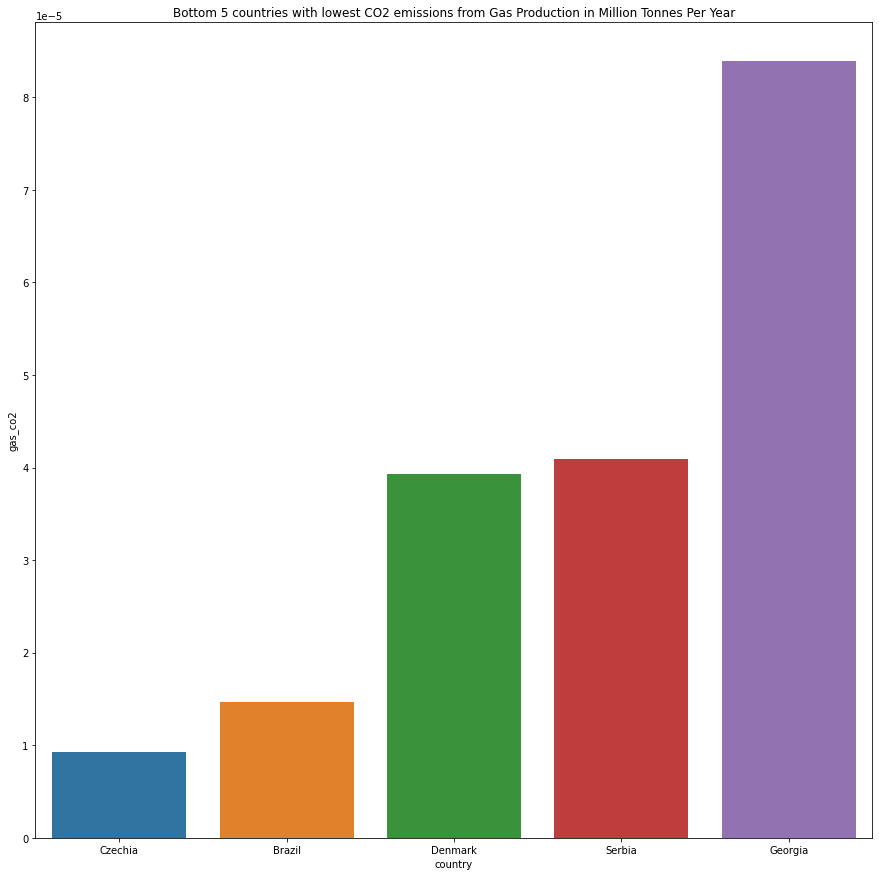

In [ ]:
# Showing the bottom 5 countries emitting the lowest amount of CO2 from gas production

bottom_gas = data.groupby('country')['gas_co2'].sum().reset_index().sort_values(by=['gas_co2'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_gas)],
    x ='country',
    y ='gas_co2',
    order = bottom_gas,
    ci=None
)

# g.set(ylim=(0,0.004))
plt.title('Bottom 5 countries with lowest CO2 emissions from Gas Production in Million Tonnes Per Year')
plt.show()



In [ ]:
# Creating a time series chloropleth map for CO2 emissions from gas production
fig = px.choropleth(
    data.groupby(['country', 'year'])['gas_co2'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='gas_co2',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions from Gas Production in Million Tonnes Per Year'
)

fig.show()

# Creating some interactive graphs and maps for CO2 emissions from oil production 

In [ ]:
# Showing the top 5 countries emitting the highest amount of CO2 from oil production

top_oil = data.groupby('country')['oil_co2'].sum().reset_index().sort_values(by=['oil_co2'], ascending=False).head(5)['country'].tolist()

fig = px.line(
    data[data['country'].isin(top_oil)],
    x='year',
    y='oil_co2',
    color='country',
    title = 'Top 5 countries with highest CO2 emissions from Oil Production measured in Million Tonnes Per Year '
)

fig.show()

Here, also we have not considered the emissions for Austria, Ireland and South Korea because these nations were not in the top emitting countries and if we observe the individual graph for this nations then we could see that the emissions were very high for the first 30 years and after that the emissions had suddenly dropped to zero.

This could be because of the fact that there were a lot of missing values for these nations and while filling these missing values using the interpolate, median and mean method this discrepancy could have been created or arised.

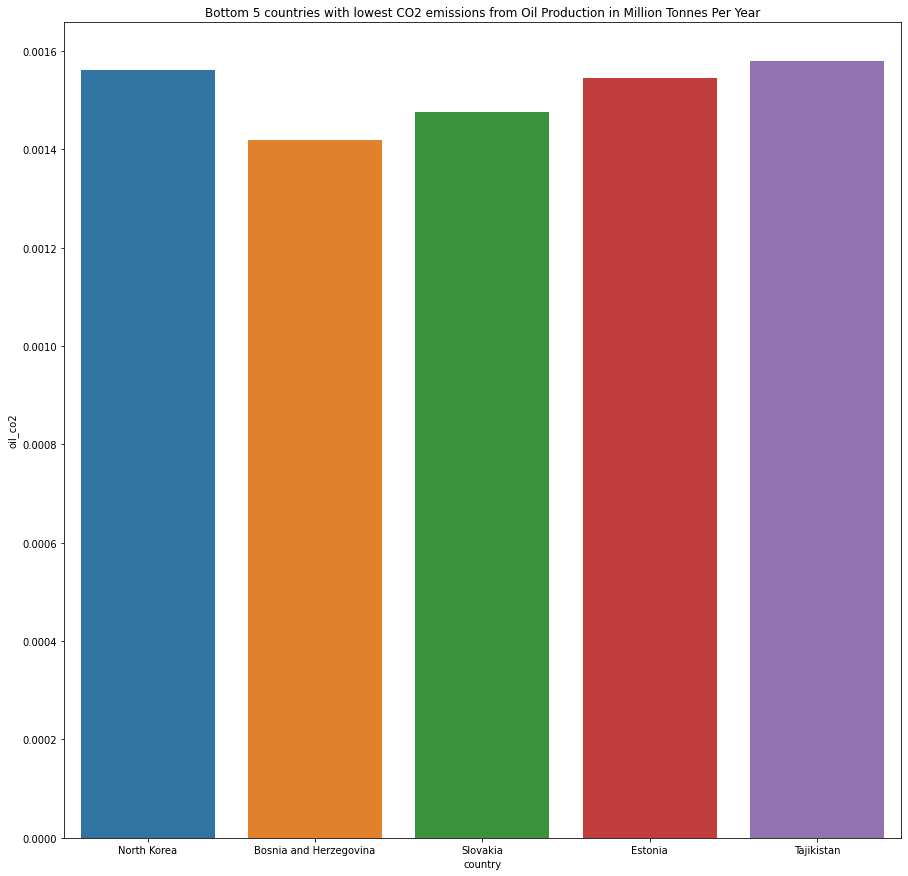

In [ ]:
# Showing the bottom 5 countries emitting the lowest amount of CO2 from oil production

bottom_oil = data.groupby('country')['oil_co2'].sum().reset_index().sort_values(by=['oil_co2'], ascending=True).head(5)['country'].tolist()

plt.figure(figsize=(15, 15))
g = sns.barplot(
    data = data[data['country'].isin(bottom_oil)],
    x ='country',
    y ='oil_co2',
    order = bottom_oil,
    ci=None
)

# g.set(ylim=(0,0.004))
plt.title('Bottom 5 countries with lowest CO2 emissions from Oil Production in Million Tonnes Per Year')
plt.show()

In [ ]:
# Creating a time series chloropleth map for CO2 emissions from gas production
fig = px.choropleth(
    data.groupby(['country', 'year'])['oil_co2'].sum().reset_index().sort_values(by=['year'], ascending=True),
    locations='country',
    locationmode='country names',
    color='oil_co2',
    color_continuous_scale='Spectral_r', # (_r) is used for inverting the color ramp
    height=750,
    animation_frame='year',
    animation_group='country'
)

fig.update_layout(
    title='CO2 Emissions from Oil Production in Million Tonnes Per Year'
)

fig.show()